In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# getting the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
# loading the dataframe
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# printing the first five rows of dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# from here we can see that the 1 is given for the passengers who have survived and the 0 is given who didn't survived
# as we have to work with two values that's why here we are using logistic regression because it works good for two values

In [6]:
# checking the number of rows and columns
df.shape

(891, 12)

In [7]:
# checking the data types present in the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# checking if there is some null values present in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# as we can see that there are some columns in the dataframe which contains null values

In [10]:
# handling the null values

In [11]:
# as we can see that there are 687 null values present in the Cabin column and there are total 891 values
# and as compare to whole data it is very large and it can affect our model so that we have to drop this entire column

In [12]:
# dropping the Cabin column because it has much null values
titanic = df.drop(columns = 'Cabin', axis = 1)
# since we have to drop the column so the axis should be one that represents the column and 0 represents the row

In [13]:
# now as the age column also have some missing values and it is less as compare to total data

In [14]:
# replacing the null values of the age column with the mean value of the age data
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [15]:
# now the embarked column has two missing values and it contains object data type so we can't replace the null values from mean
# so filling the missing values from the mode the data i.e. which is repeated most of the times

In [16]:
# finding the mode value of Embarked column
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [17]:
# here we can see that the 'S' is repeated most of the times and it has index value 0 so now replacing the two null values of
# Embarked column from it's mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [18]:
# checking again to see if the null values are replaced or not
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# now we can see that all the null values are handled properly

In [20]:
# getting some statistical measures of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# visualizing the data

In [22]:
# finding the number of people survived and not survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
# here we can see that there are 549 people who didn't survived and 342 people survived

In [24]:
# importing some more required liberary
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Survived', ylabel='count'>

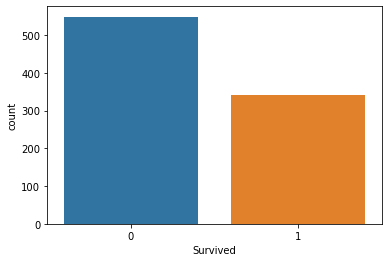

In [25]:
# making a countplot for Survived column
sns.countplot('Survived', data = titanic)

In [26]:
#  here we can see that number of survivours are less than the number of people who didn't survived

In [27]:
# finding the total number of males and females
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

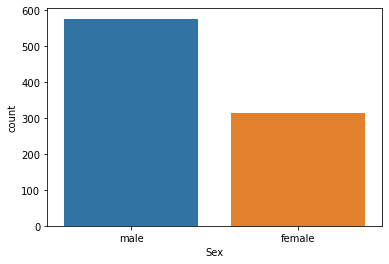

In [28]:
# making countplot for Sex column
sns.countplot('Sex', data = titanic)

In [29]:
# here we can see than there are more male passengers than female

<AxesSubplot:xlabel='Sex', ylabel='count'>

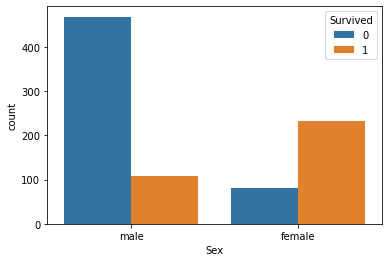

In [30]:
# comparing the number of survivours gender wise
sns.countplot('Sex', hue = 'Survived', data = titanic)

In [31]:
# as we seen that there are more male passengers than the female but in comparison of survival the more females are survied
# than male and it is obvious because females were given more prority to save after the accident

In [32]:
# finding the total number of passengers in different class
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

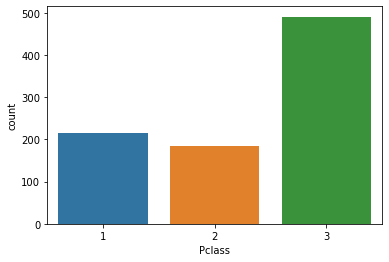

In [33]:
# making countplot for Pclass column
sns.countplot('Pclass', data = titanic)

In [34]:
# here we can see that there are more number of people in 3rd class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

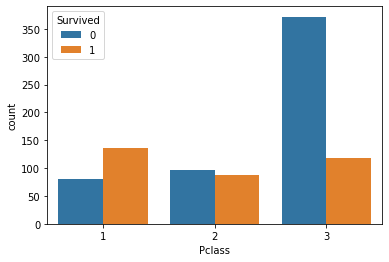

In [35]:
# now finding the number of people survived Pclass wise
sns.countplot('Pclass', hue = 'Survived', data = titanic)

In [36]:
# from here we can see that the more number of people survied from first classs and less from 2nd class but very much number of
# people died of 3rd class

In [37]:
# finding the total number of passengers SibSp wise
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

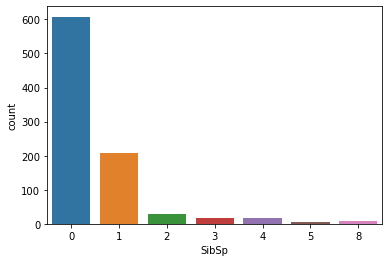

In [38]:
# making countplot for SibSp column
sns.countplot('SibSp', data = titanic)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

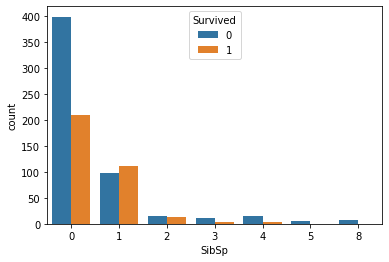

In [39]:
# now finding the number of people survived SibSp wise
sns.countplot('SibSp', hue = 'Survived', data = titanic)

In [40]:
# finding the total number of passengers Parch wise
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

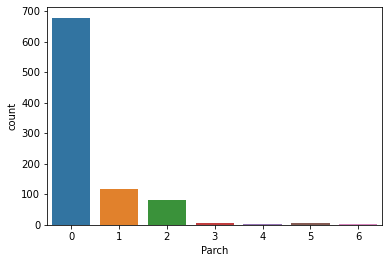

In [41]:
# making countplot for Parch column
sns.countplot('Parch', data = titanic)

<AxesSubplot:xlabel='Parch', ylabel='count'>

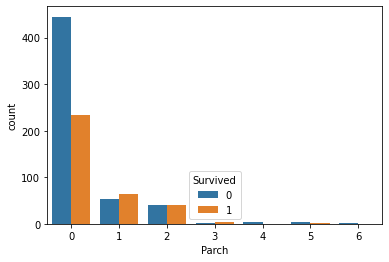

In [42]:
# now finding the number of people survived Parch wise
sns.countplot('Parch', hue = 'Survived', data = titanic)

In [43]:
# finding the total number of passengers Embarked wise
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

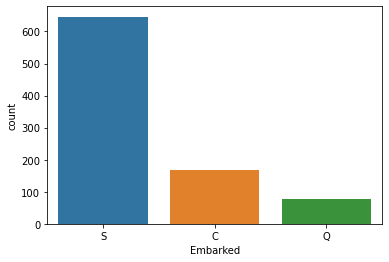

In [44]:
# making countplot for Embarked column
sns.countplot('Embarked', data = titanic)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

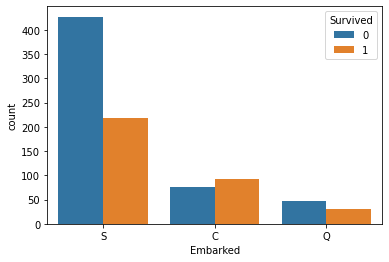

In [45]:
# now finding the number of people Embarked wise
sns.countplot('Embarked', hue = 'Survived', data = titanic)

In [46]:
# Doing Encoding with the columns which contains object data type

In [47]:
# as we know that the sex column contains only two types of data i.e. male and female. And Embarked column contains three 
# different object data i.e. S, C and Q
# so replacing the male as 0 and female as 1 in Sex column
# and S as 0, C as 1, and Q as 2 in Embarked column

In [48]:
# encoding with the Sex and Embarked colomn
titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [49]:
# seeing the changes that we have done with the data
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


In [50]:
# here our target is to predict whether the passenger survived or not so our target column is Survived
# the columns PassengerId, Name, and Ticket are just their identity and it won't be needed for our work so we will drop them
# we will seperate rest other tables from Survived columns

In [51]:
# dropping the columns PassengerId, Name, and Ticket we will also drop the Survived column so that we can split the other
# columns from it 
x = titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)

# seperating the target column Survived 
y = titanic['Survived']

In [52]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
# splitting the data into training and test data

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [56]:
# seeing the shape of data after splitting
x.shape, x_train.shape, x_test.shape

((891, 7), (712, 7), (179, 7))

In [57]:
# Doing model training

In [66]:
# training the logistic regression model with training data
LogisticRegression().fit(x_train, y_train)

LogisticRegression()

In [67]:
# doing model evaluation

In [68]:
# prediction of training data
x_train_prediction = model.predict(x_train)

In [69]:
x_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [70]:
# seeing the accuracy of prediction of data by comparing it with the original data
train_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy Score:',train_data_accuracy)

Accuracy Score: 0.8075842696629213


In [71]:
# here we can see that the accuracy of the prediction is about 80%

In [72]:
# prediction of test data
x_test_prediction = model.predict(x_test)

In [73]:
x_test_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [74]:
# seeing the accuracy of prediction of data by comparing it with the original data
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy Score:',test_data_accuracy)

Accuracy Score: 0.7821229050279329


In [75]:
# here we can see that the accuracy score of the test data is about 78% and there is not much difference in accuracy of 
# test data and training data